<a href="https://colab.research.google.com/github/ZahraKheyrandish/Customer-Churn-Prediction-BI/blob/main/Customer_Churn_Prediction_BI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np


In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [104]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [105]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df.isnull().sum()
df.shape
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].value_counts()
df.drop('customerID', axis=1, inplace=True)
df.head()
categorical_cols_multi_level = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 2]
categorical_cols_binary = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() == 2]
for col in categorical_cols_binary:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})
df = pd.get_dummies(df, columns=categorical_cols_multi_level, drop_first=True, dtype=int)
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  MultipleLines_No phone service         7032 non-null   int64  
 11  MultipleL

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

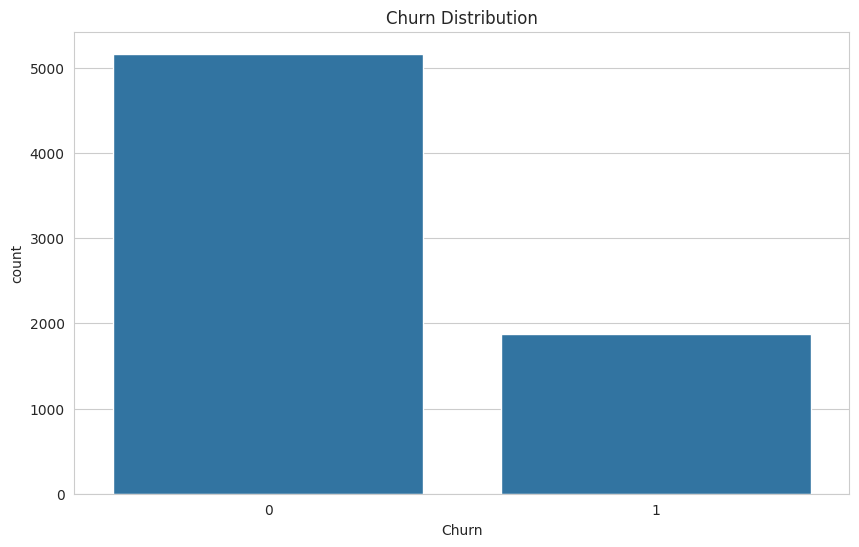

In [108]:
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

In [109]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

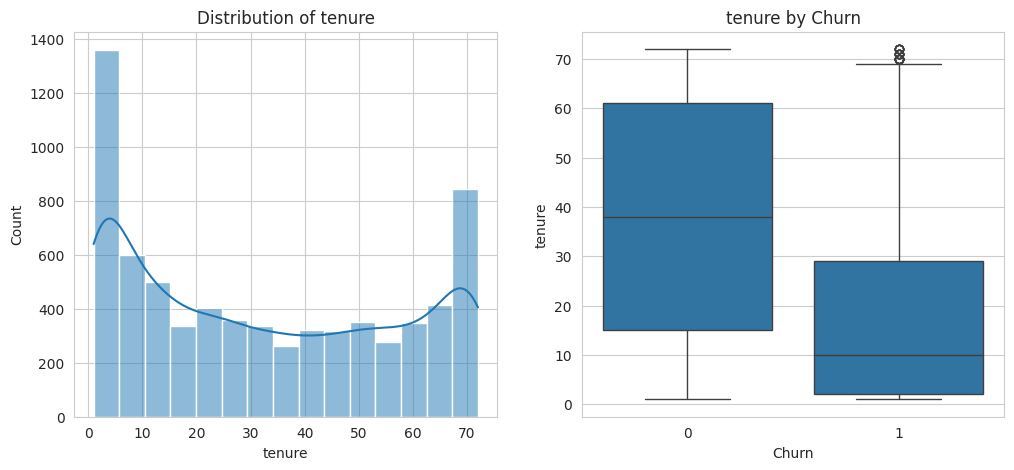

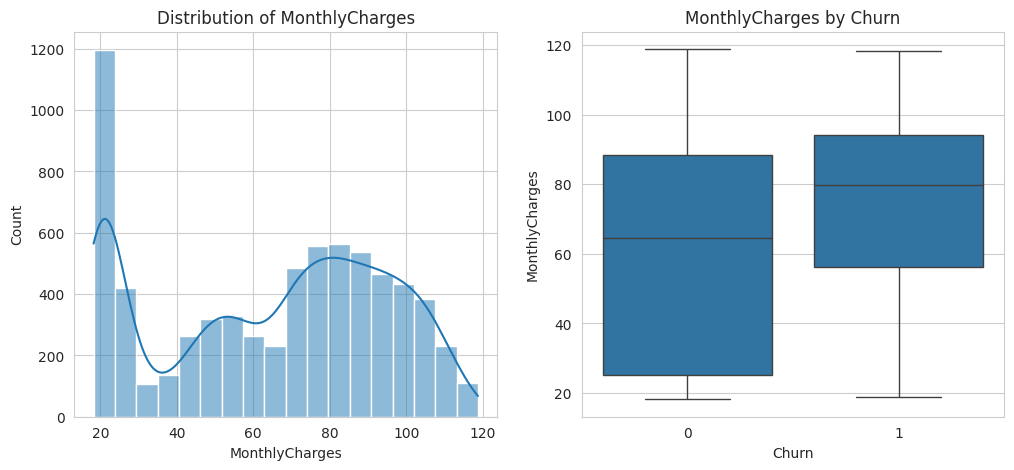

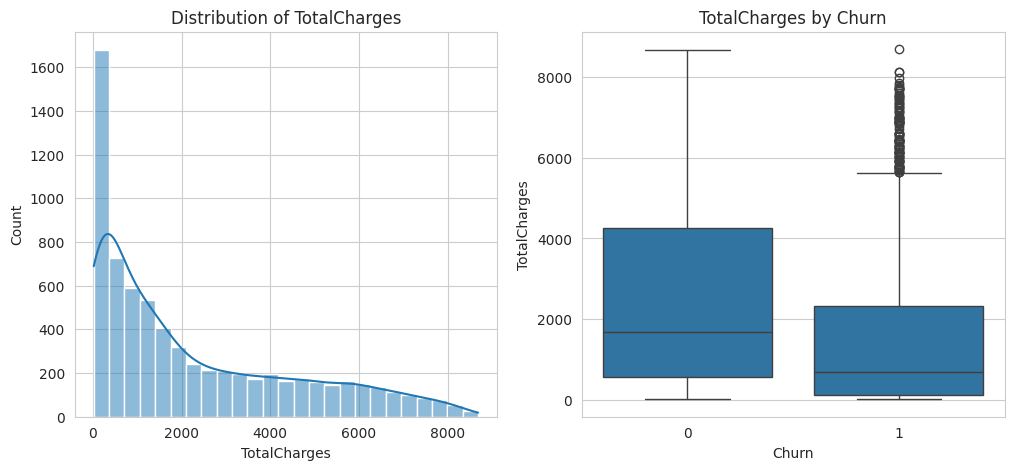

In [110]:
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f'{col} by Churn')
    plt.show()

In [111]:
all_cols_except_numerical_and_churn = df.columns.difference(numerical_cols + ['Churn'])


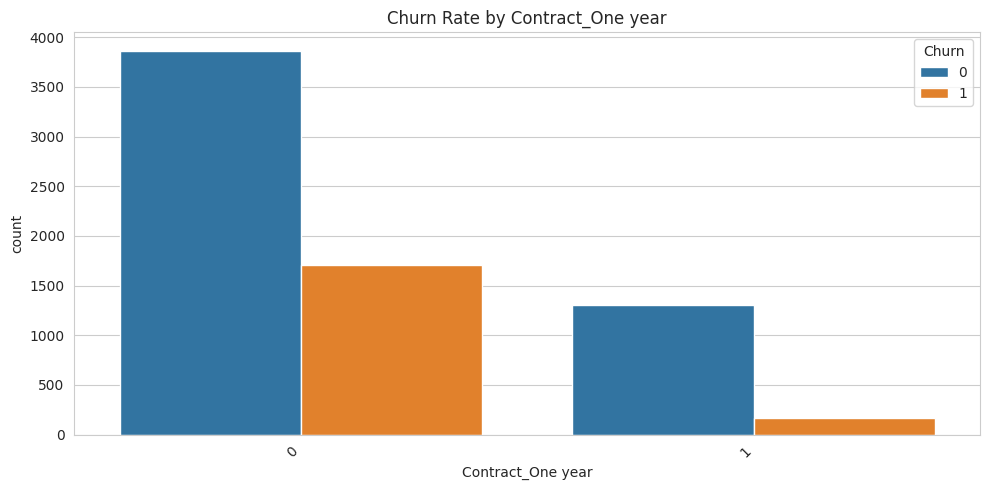

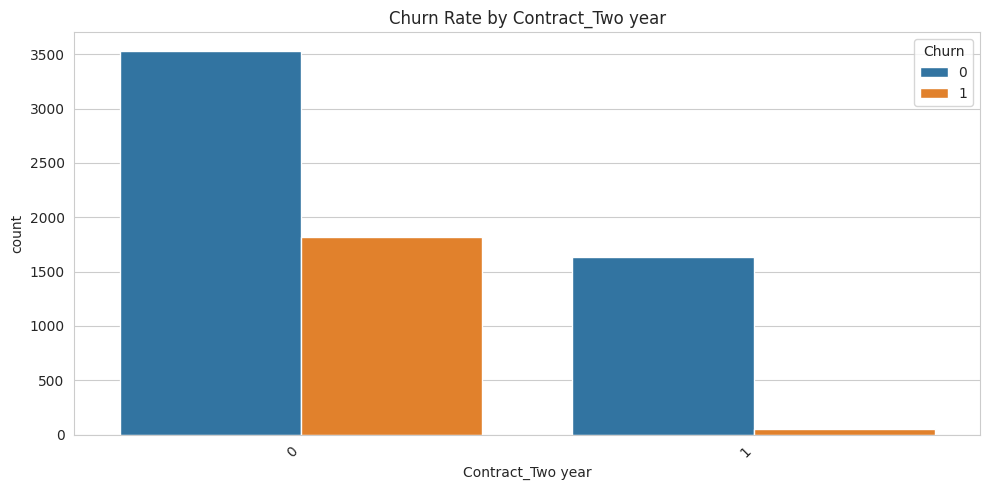

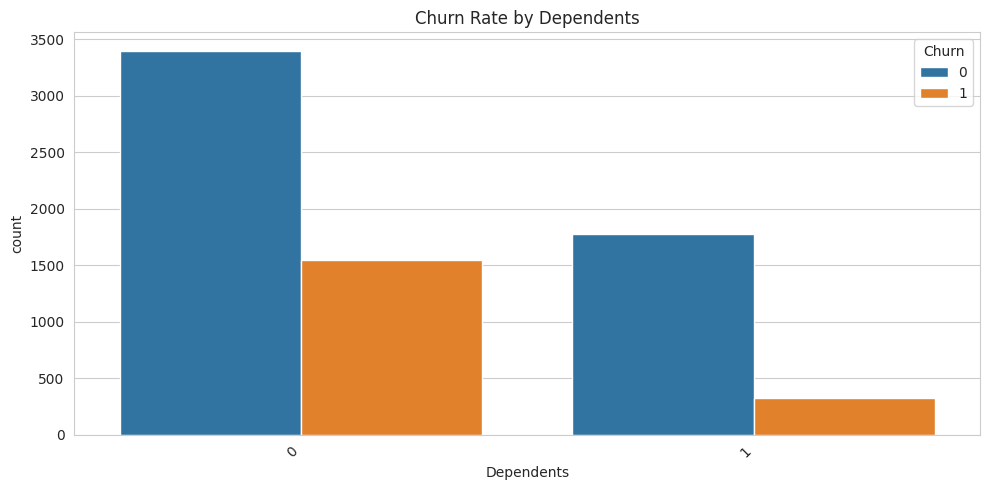

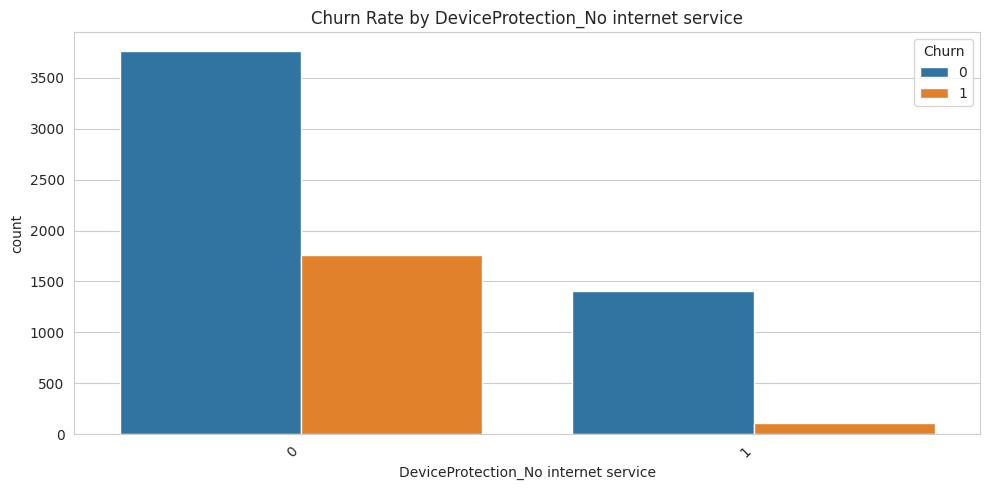

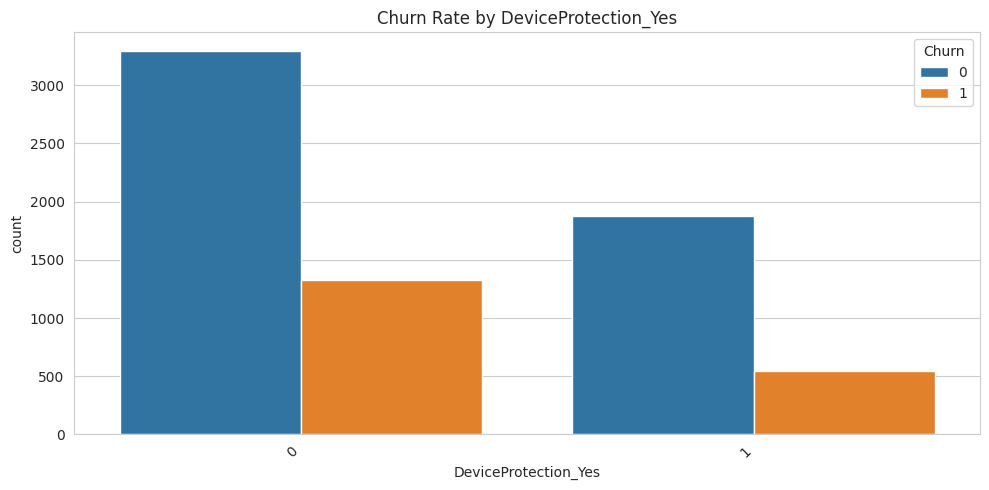

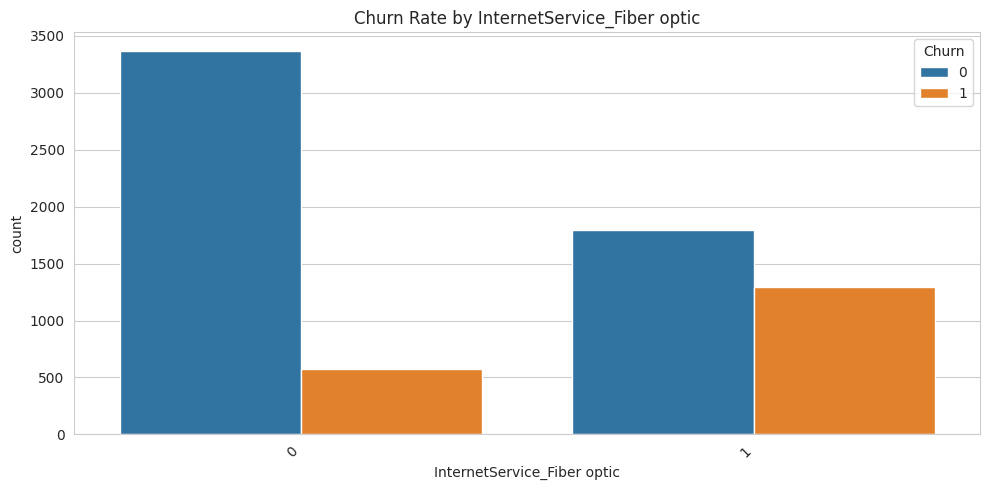

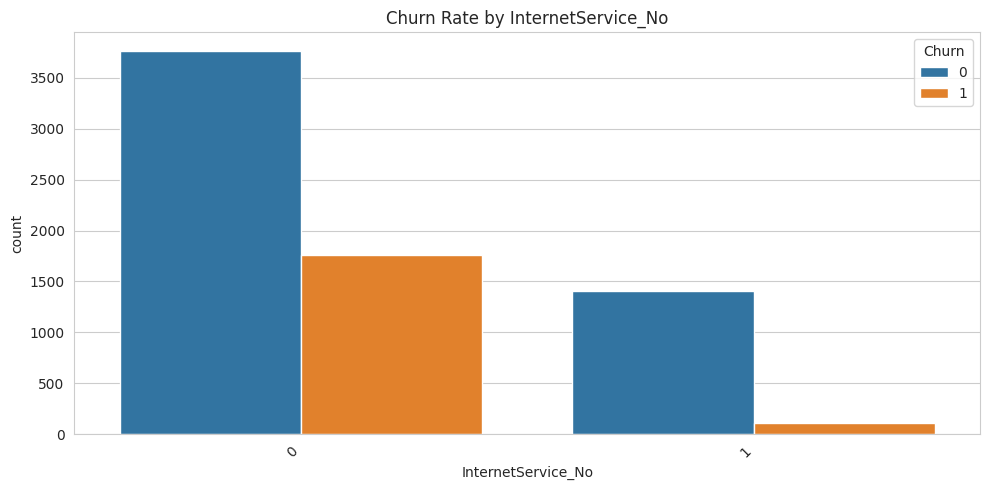

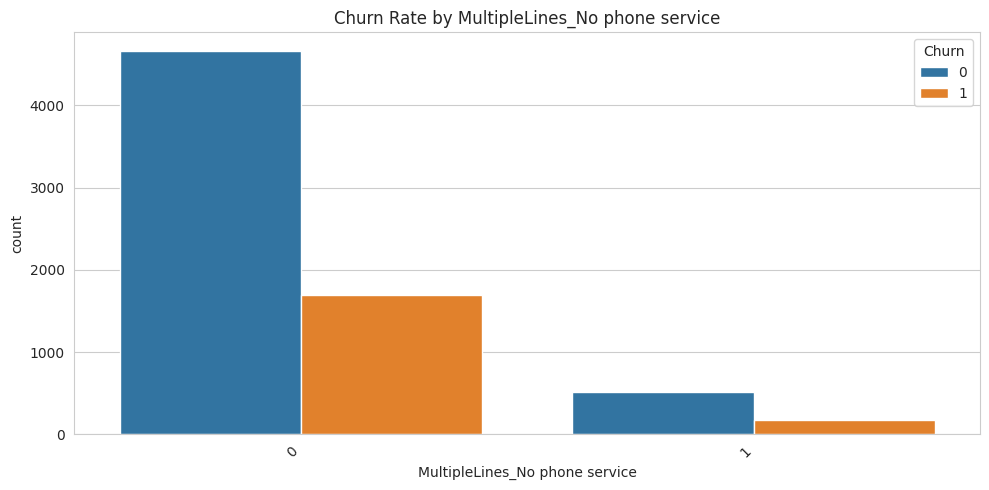

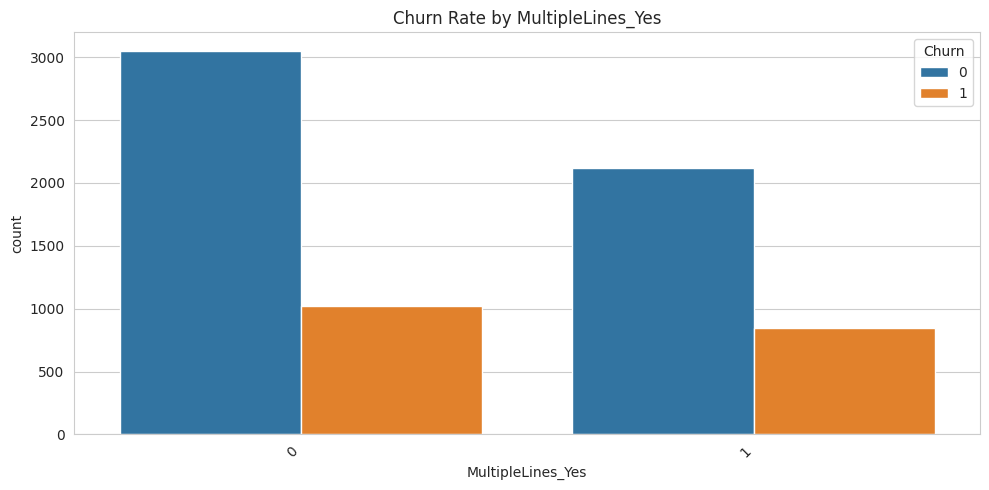

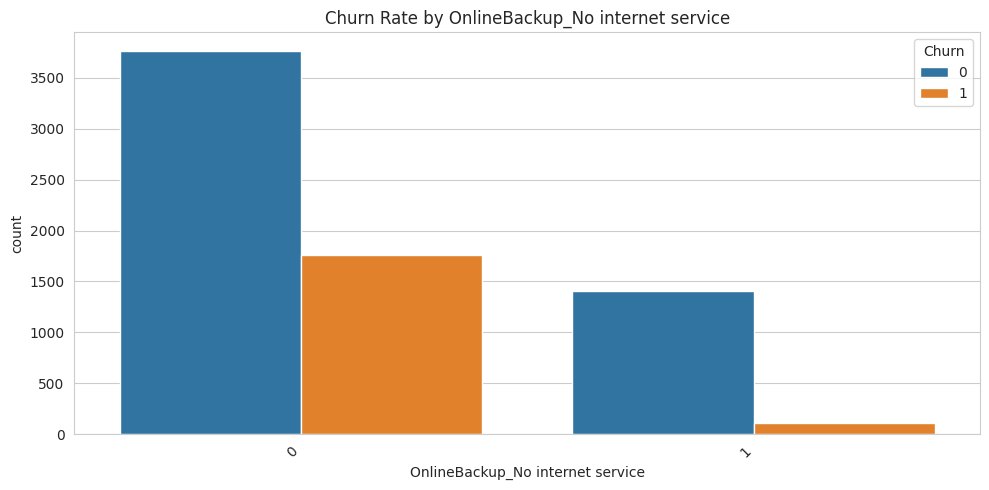

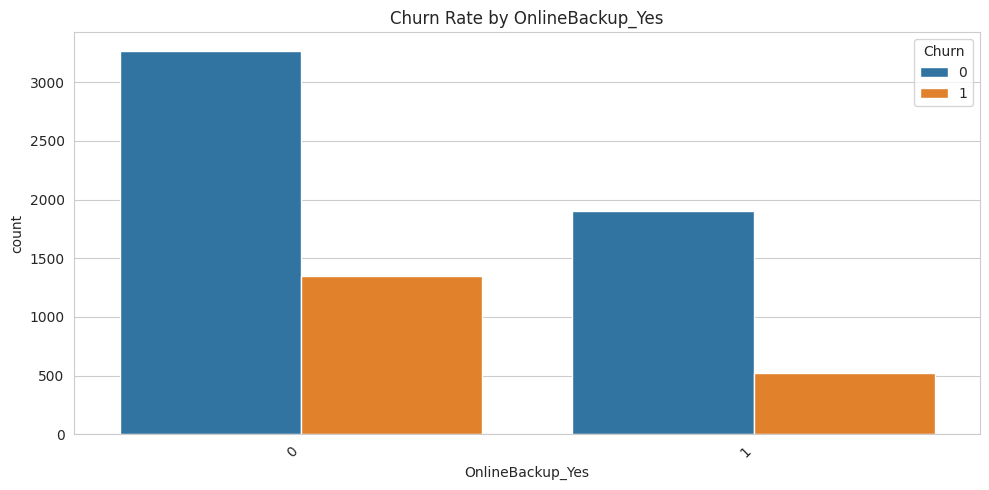

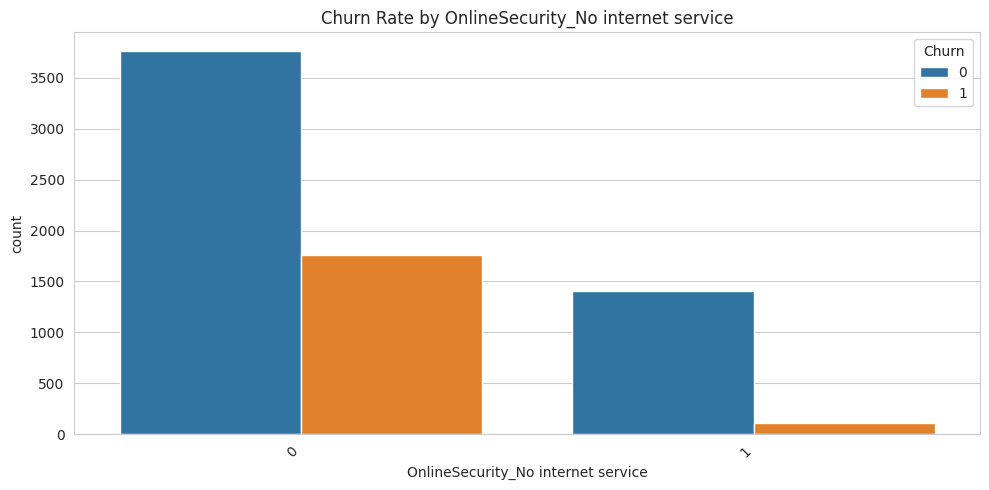

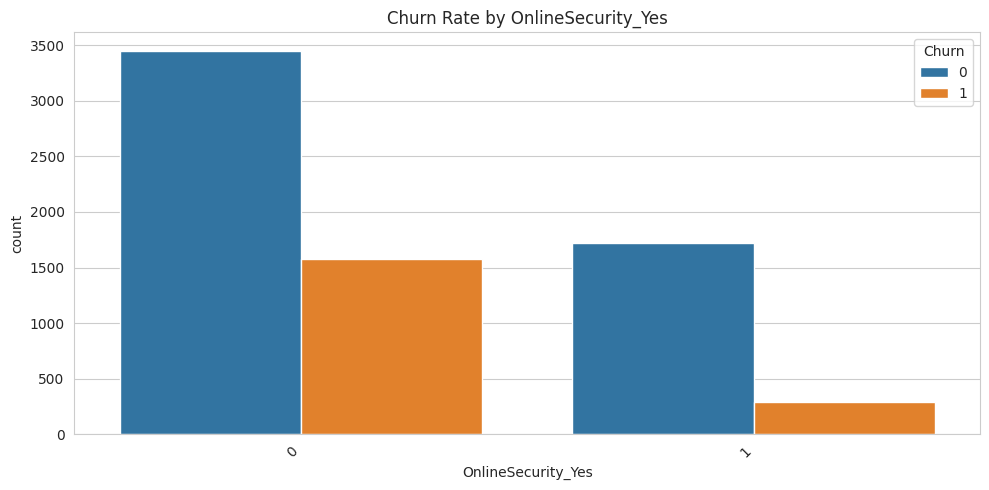

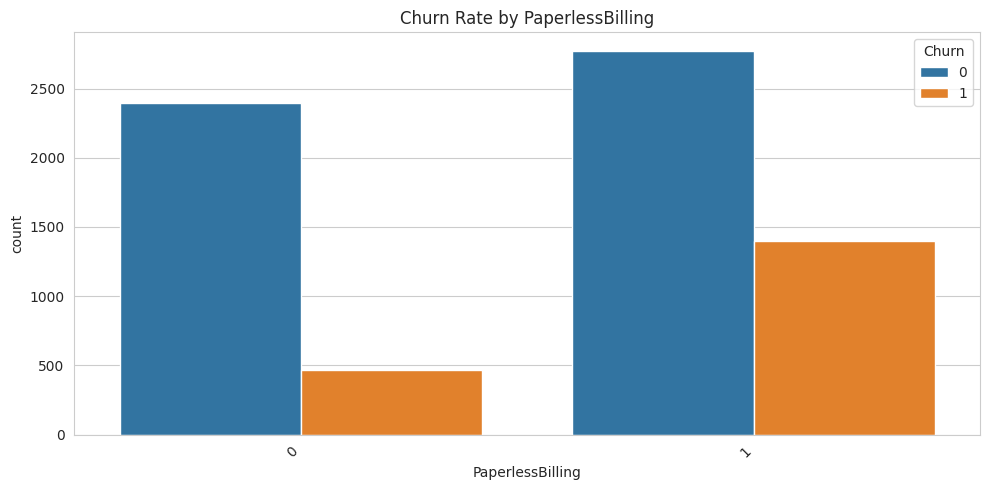

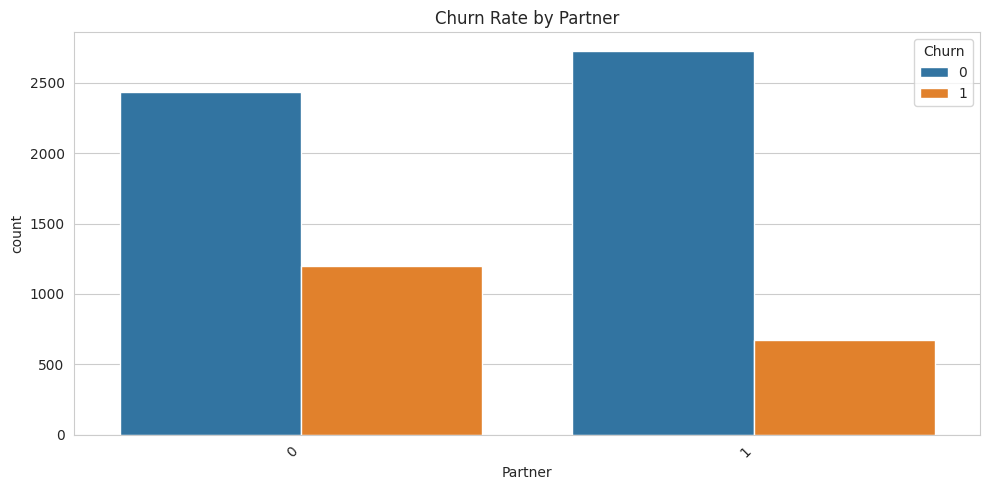

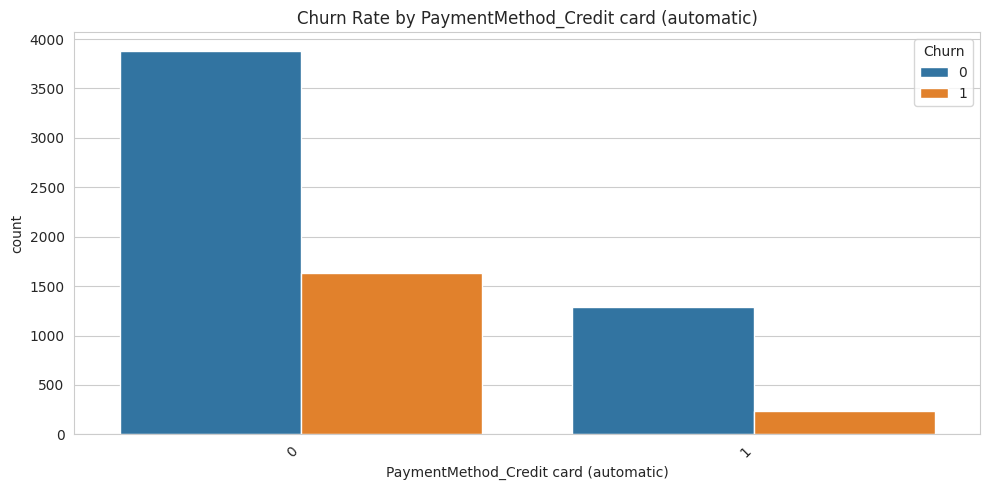

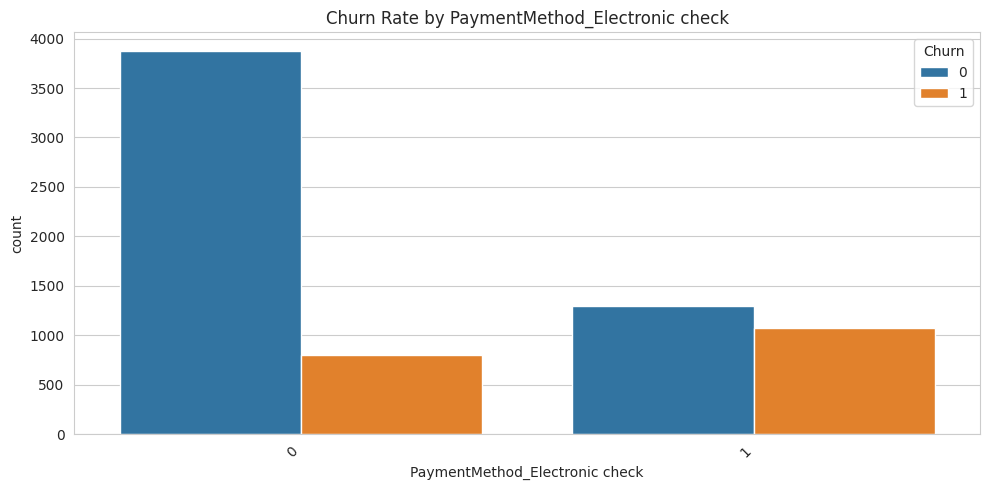

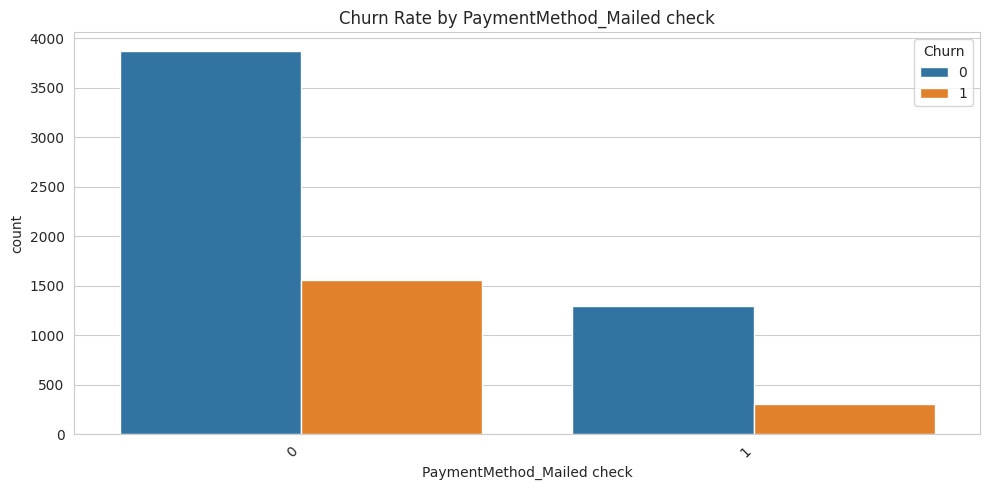

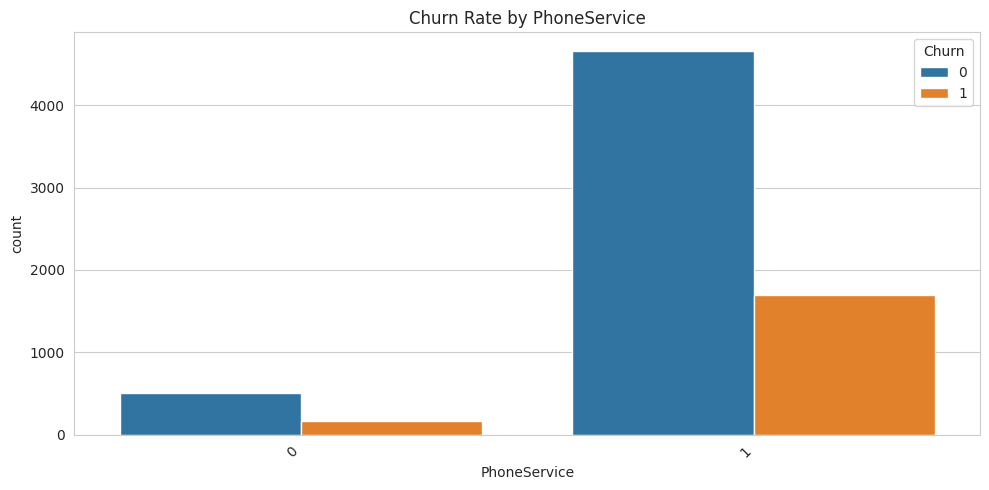

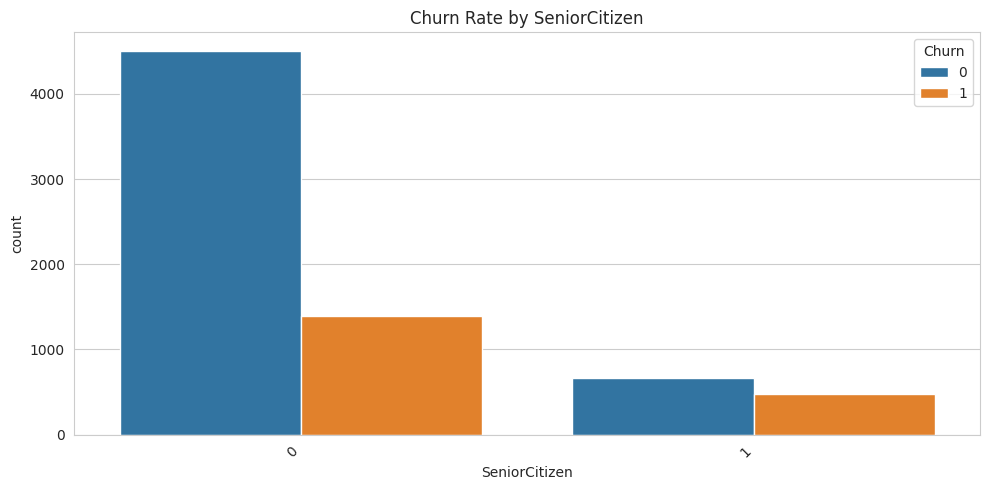

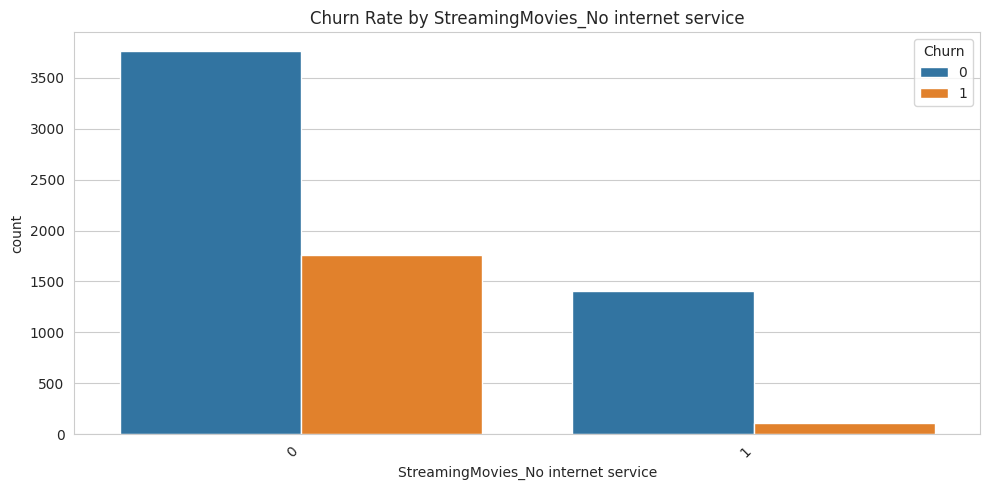

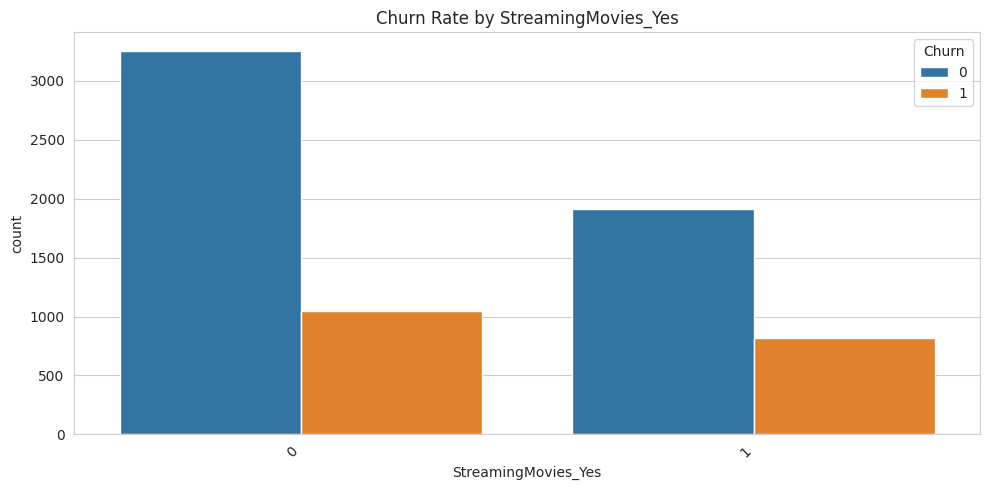

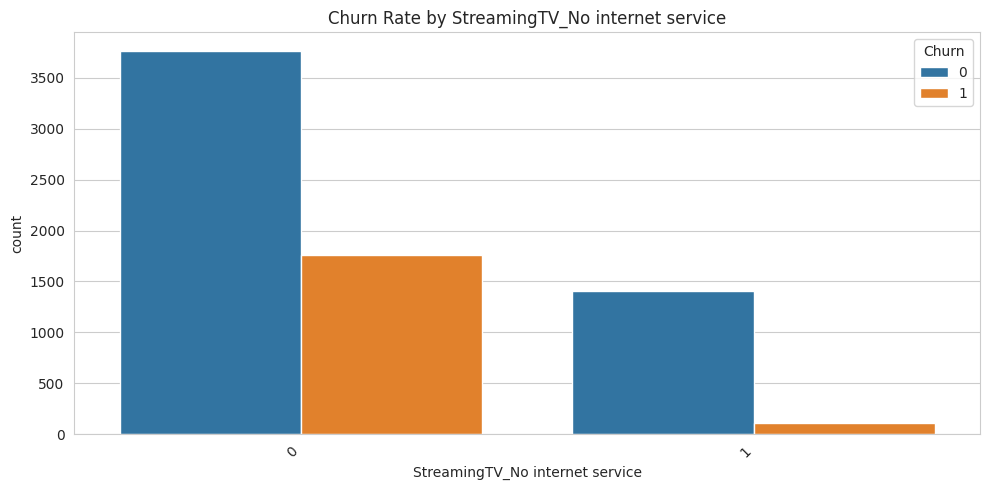

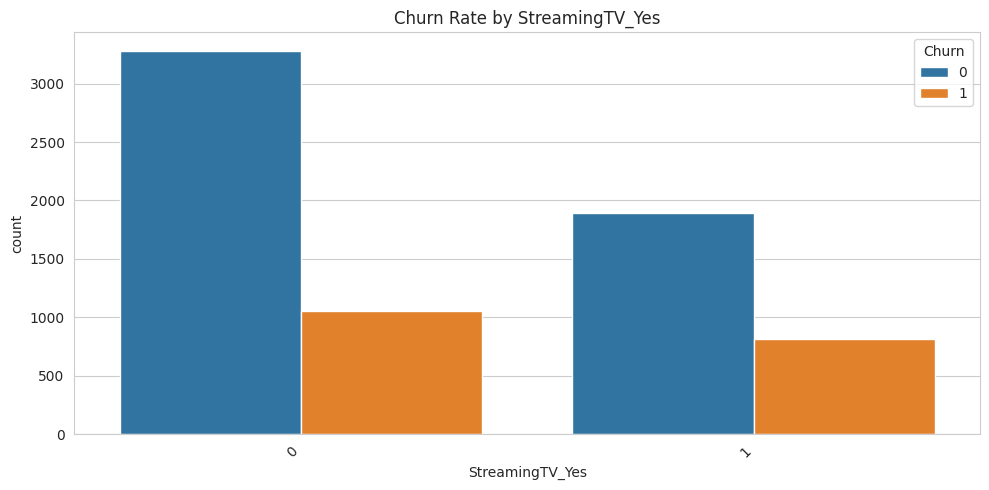

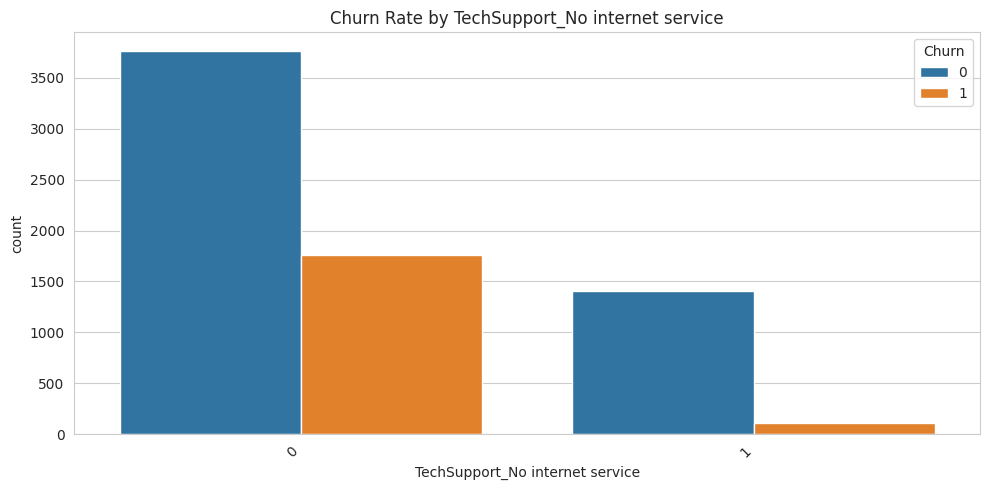

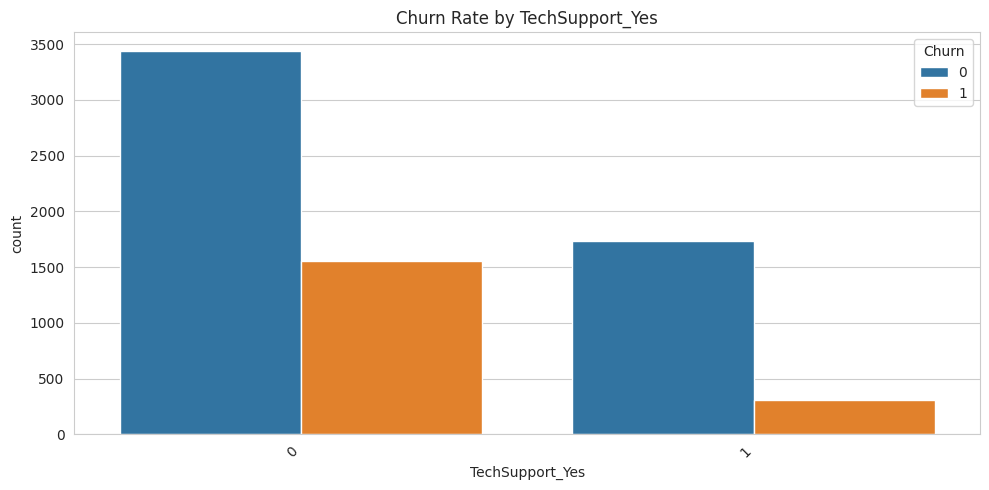

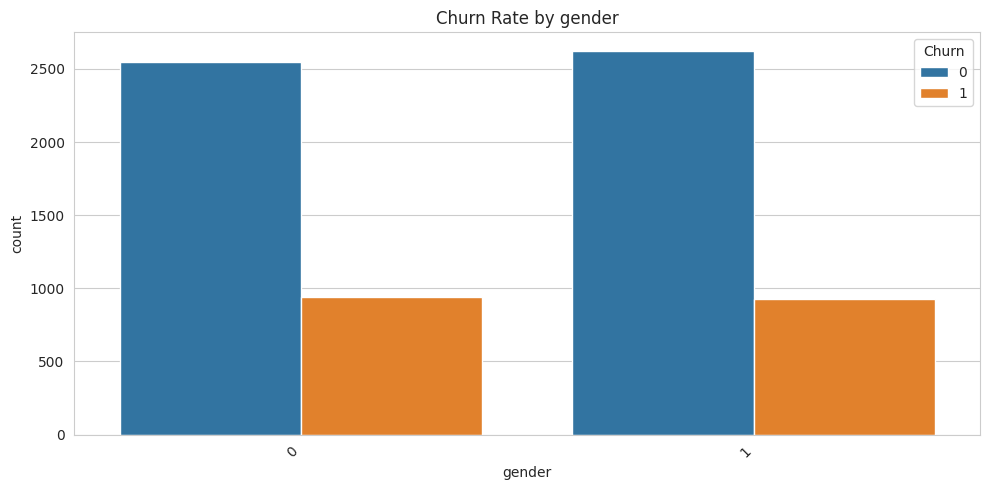

In [112]:
for col in all_cols_except_numerical_and_churn:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'Churn Rate by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

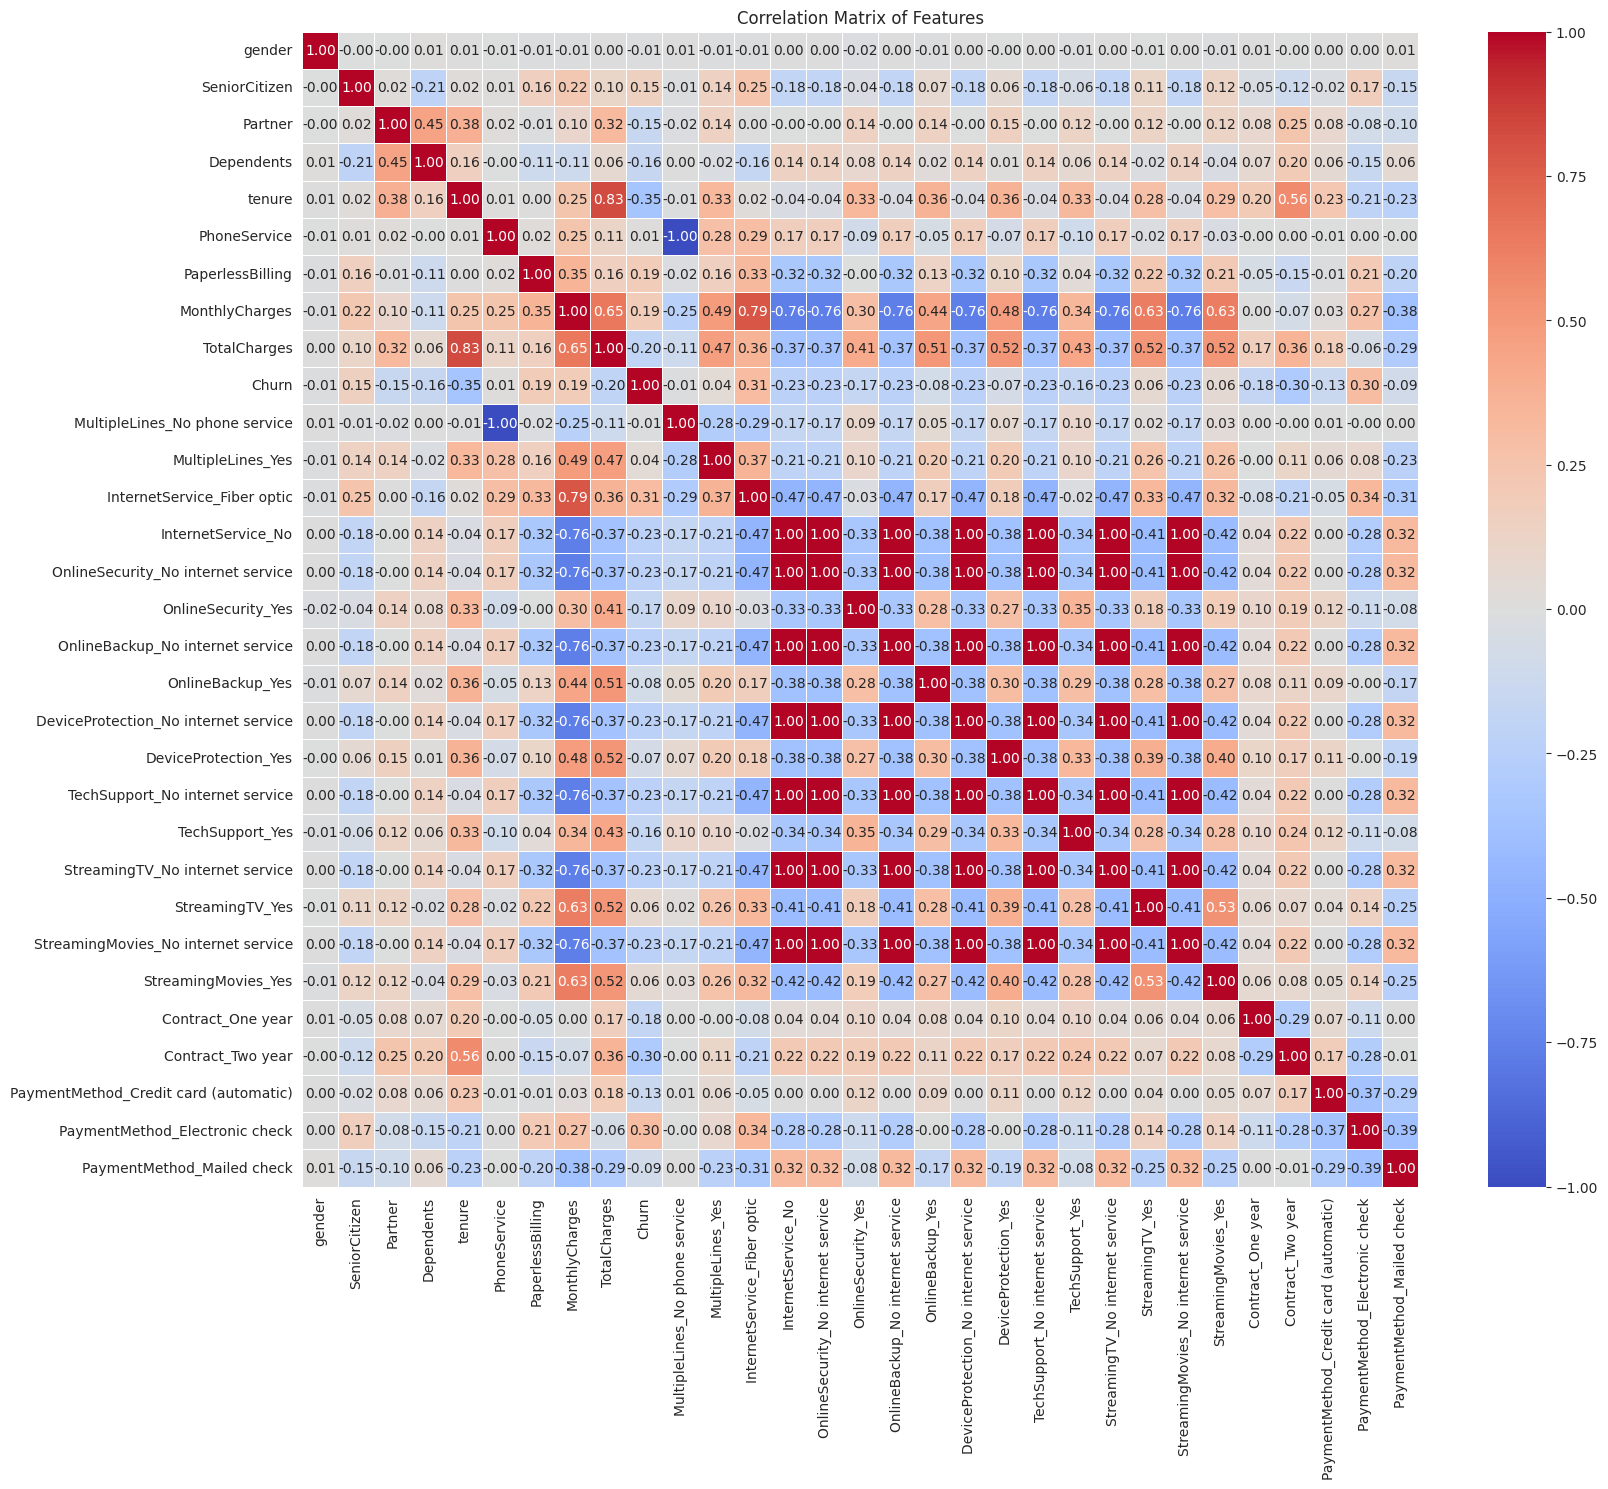

In [113]:
plt.figure(figsize=(18, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [114]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV # Changed to RandomizedSearchCV
from scipy.stats import uniform, randint # For RandomizedSearchCV distributions

In [115]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [116]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [117]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [118]:
scaler = StandardScaler()

In [119]:
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [120]:
# Define the parameter distributions for RandomizedSearchCV
# Using smaller ranges for quicker demonstration
param_distributions = {
    'num_leaves': randint(20, 50), # Random integer between 20 and 50
    'max_depth': [-1, 5, 10], # Fixed options for max_depth
    'learning_rate': uniform(0.01, 0.15), # Uniform distribution between 0.01 and 0.15
    'n_estimators': randint(100, 500) # Random integer between 100 and 500
}

In [121]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1413,1,0,1,1,1.321816,1,0,0.981556,1.659900,0,...,1,0,0,0,0,0,1,1,0,0
7003,1,0,0,0,-0.267410,0,0,-0.971546,-0.562252,1,...,1,0,0,0,0,0,0,0,1,0
3355,0,0,1,0,1.444064,1,0,0.837066,1.756104,0,...,1,0,0,0,0,0,1,1,0,0
4494,1,0,0,0,-1.204646,1,0,0.641092,-0.908326,0,...,0,0,0,0,1,0,0,0,1,0
3541,0,0,1,0,0.669826,0,0,-0.808787,-0.101561,1,...,0,0,1,0,0,0,0,0,0,0


In [122]:
lgbm = LGBMClassifier(random_state=42, scale_pos_weight=scale_pos_weight_value)

In [123]:
param_grid = {
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'n_estimators': [100, 200, 300, 400]
}

In [124]:
# Initialize RandomizedSearchCV
# n_iter specifies the number of parameter settings that are sampled.
# Lower this number for faster execution, increase for more thorough search.
random_search = RandomizedSearchCV(estimator=lgbm, param_distributions=param_distributions,
                                   n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best ROC-AUC score: ", random_search.best_score_)

# Train the final model with the best parameters
model = random_search.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
Best parameters found:  {'learning_rate': np.float64(0.010078056549297373), 'max_depth': -1, 'n_estimators': 332, 'num_leaves': 22}
Best ROC-AUC score:  0.8461910970385546


In [125]:
print("--- Model Evaluation Metrics (After Hyperparameter Tuning) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")


--- Model Evaluation Metrics (After Hyperparameter Tuning) ---
Accuracy: 0.7960
Precision: 0.6465
Recall: 0.5134
F1-Score: 0.5723
AUC-ROC: 0.8411


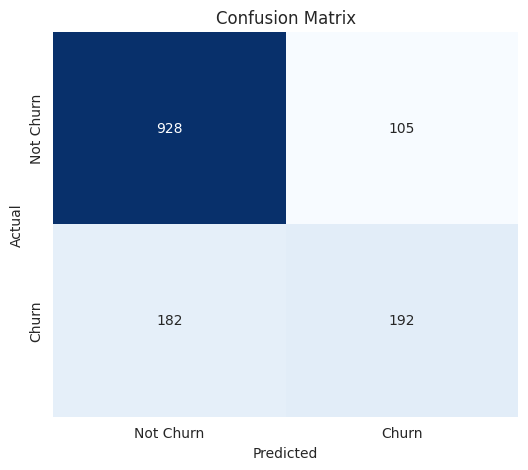

In [126]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

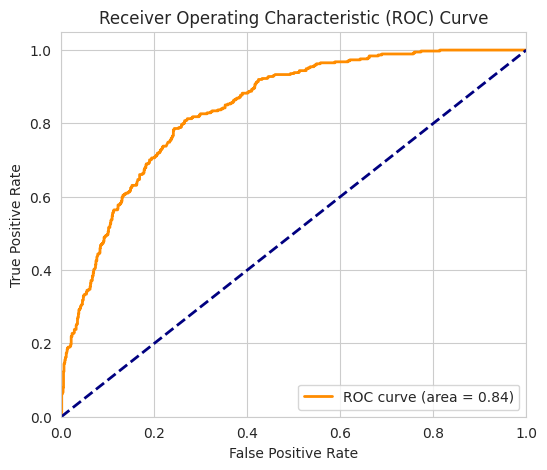

In [127]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [128]:
feature_importances = model.feature_importances_

In [129]:
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})


In [130]:
features_df = features_df.sort_values(by='Importance', ascending=False)

In [131]:
print("\n--- Top 10 Most Important Features ---")
print(features_df.head(10))



--- Top 10 Most Important Features ---
                           Feature  Importance
4                           tenure        1455
7                   MonthlyCharges        1440
8                     TotalCharges        1008
28  PaymentMethod_Electronic check         304
14              OnlineSecurity_Yes         249
26               Contract_Two year         195
25               Contract_One year         188
6                 PaperlessBilling         186
12              InternetService_No         184
20                 TechSupport_Yes         179


/tmp/ipython-input-132-1605226573.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')


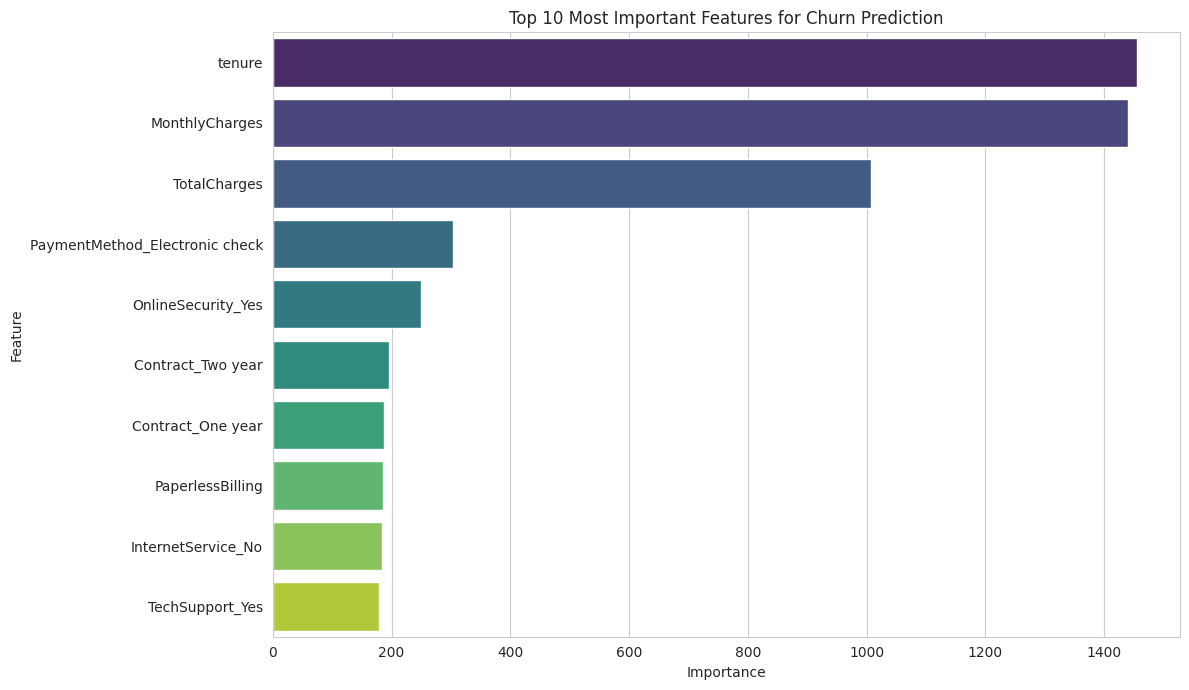

In [132]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10), palette='viridis')
plt.title('Top 10 Most Important Features for Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
